# Clustering

![so easy for us](assets/clustering/robot-having-trouble.jpg)

(image: [toptal](https://www.toptal.com/machine-learning/clustering-algorithms))

## Where are we?

![yay, one more quadrant covered](assets/linear-regression/machine-learning-cheet-sheet.png)

(image: [sas.com](https://www.sas.com/en_us/insights/analytics/machine-learning.html))

## Supervised / Unsupervised Learning

Unsupervised learning:
- Just dataset, no targets or labels
- Algorithm needs to "make sense" of the data itself
- E.g. clustering, dimension reduction

Supervised learning:
- Dataset with targets or labels
- Algorithm learns by minimizing loss against the targets / labels
- E.g. Classification, regression

![supervised vs unsupervised](assets/clustering/supervised_unsupervised.png)

(image: [Vibhor Agarwal](https://medium.com/@agarwalvibhor84/getting-started-with-machine-learning-using-sklearn-python-7d165618eddf))

## Clustering

Objective: given a dataset with just features, find groups (or clusters) of them

Broad applications:
- Market segmentation
- User recommendations
- Anormaly detection

https://en.wikipedia.org/wiki/Cluster_analysis#Applications

## Algorithms

- K-means / K-modes
- Expectation Maximization / Gaussian Mixture
- DBSCAN

Comparison (worth checking out):
http://scikit-learn.org/stable/modules/clustering.html#overview-of-clustering-methods

## K-means

## Gaussian Mixture

http://scikit-learn.org/stable/modules/mixture.html#gaussian-mixture

## DBSCAN

http://scikit-learn.org/stable/modules/clustering.html#dbscan

## Evaluation Metrics

http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation


In [190]:
import pandas as pd

# usecols=['year_release', 'romanised_title', 'publishers', 'region', 'platform', 'rating'])
#                usecols=['publishers', 'region', 'platform', 'rating'])

df = pd.read_csv('D:/tmp/video-games-classification-database/video-games-classification-database.csv',
                usecols=['year_release', 'romanised_title', 'publishers', 'region', 'platform', 'rating'])

df.head()

,romanised_title,publishers,year_release,region,platform,rating
0,ATTOUTEKI YUUGI: MUGEN SOULS Z,IDEA FACTORY CO. LTD,2013,"ASIA,EURO",Sony Playstation 3,Age Advisory
1,ARMA III,BOHEMIA INTERACTIVE,2013,ASIA,PC,Age Advisory
2,TOTAL WAR: SHOGUN 2 GOLD EDITION,SEGA EUROPE,2013,EURO,PC,General
3,COMPANY OF HEROES 2,SEGA EUROPE,2013,ASIA,PC,Age Advisory
4,COMPANY OF HEROES 2 RED STAR EDITION,SEGA EUROPE,2013,ASIA,PC,Age Advisory


In [191]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
encoded_df = df[df.columns[:]].apply(le.fit_transform)
encoded_df.head()

,romanised_title,publishers,year_release,region,platform,rating
0,45,79,6,1,83,0
1,28,38,6,0,60,0
2,703,153,6,8,60,1
3,103,153,6,0,60,0
4,104,153,6,0,60,0


In [192]:
encoded_df.rating.unique()

array([0, 1, 2], dtype=int64)

In [233]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

n_ratings = len(encoded_df.rating.unique())
n_samples = 50 # get a subset of samples

data = encoded_df.loc[:, 'romanised_title':'rating']
data = data.sample(frac=1).reset_index(drop=True)
data = data[:n_samples]

labels = data.loc[:, 'rating']
data = data.loc[:, 'romanised_title':'platform']
data = scale(data)

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_ratings, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [234]:
data[:5, :]

array([[-0.75847317, -1.41802978, -0.93811359,  1.28157435,  0.4804135 ],
       [-1.41665576, -1.65827202, -0.93811359,  0.72678026,  0.59645541],
       [-0.48697285, -0.69730308, -2.02894335, -0.66020497, -0.44792176],
       [-0.43760915,  0.18859015, -0.93811359, -0.66020497, -1.33757639],
       [-0.19490432, -0.48709113,  0.15271617, -0.66020497,  0.40305223]])

In [223]:
reduced_data[:5, :]

array([[-1.34657673, -1.21635814],
       [ 2.72135284, -0.53020643],
       [-0.25237368, -0.14284584],
       [ 0.60532584,  0.57480136],
       [-1.67367971, -1.3402463 ]])

In [239]:
labels[:5].values

array([0, 0, 1, 1, 0], dtype=int64)

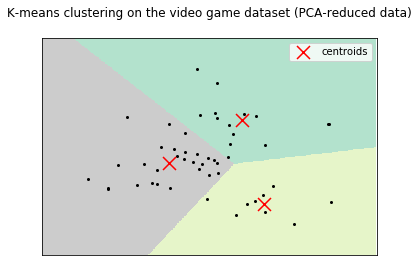

In [236]:
# http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots()
ax.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Pastel2,
          aspect='auto', origin='lower')

ax.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=4)

# Plot the centroids as a red X
centroids = kmeans.cluster_centers_

ax.scatter(centroids[:, 0], centroids[:, 1],
           marker='x', s=169, linewidths=3,
           color='red', zorder=10, label='centroids')
ax.set(title='K-means clustering on the video game dataset (PCA-reduced data)\n',
       xlim=(x_min, x_max), ylim=(y_min, y_max),
       xticks=(), yticks = ())
ax.legend()

In [237]:
kmeans.labels_

array([0, 0, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 0, 1, 2])

In [240]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels.values, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels.values, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels.values, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels.values, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data, kmeans.labels_, sample_size=n_samples))

Homogeneity: 0.049
Completeness: 0.048
V-measure: 0.049
Adjusted Rand-Index: -0.007
Silhouette Coefficient: 0.221
